# Atelier Données ouvertes

HNU3055 / HNU6055

**Équipe**
Parham Aledavood
Maxime Guénette
Amélie Levasseur-R.

**Question**
Voir s'il y a une relation entre le taux de vaccination et les cas et hospitalisations de COVID-19, selon les régions administratives du Québec.

**Sources des données**
https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-de-la-vaccination#
https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-des-hospitalisations/resource/2d8bd4f8-4715-4f33-8cb4-eefcec60a4c9

**Documents explicatifs**
listevariables_notesmetho_vaccination_20221107.pdf
listevariables_notesmetho_hospit_20220621.pdf


**Problèmes rencontrés**

- Adapter le code trouvé à nos besoins spécifiques. Par exemple, nous avons eu de la difficulté à conserver les colonnes qui contiennent "Total" et aussi celle de la date. -> RÉGLÉ!

- Rendre analyse proportionnelle selon la population de chaque région. Doit trouver données sur la population par région.

- Doit revoir les données de vaccination conservées, utiliser les données par jour et non le cumul qui ne peut qu'augmenter. -> RÉGLÉ!

## Charger les librairies

In [1]:
import pandas as pd

## Téléchargement des données

In [2]:
url_vacc = "https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_Vaccination_RegionResidence.csv"
df_vacc = pd.read_csv(url_vacc)
# source code : https://datatofish.com/export-dataframe-to-csv/
df_vacc.to_csv(r'data/raw/COVID19_Qc_Vaccination_RegionResidence.csv')

url_hosp = "https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_HistoHospit.csv"
df_hosp = pd.read_csv(url_hosp)
df_hosp.to_csv(r'data/raw/COVID19_Qc_HistoHospit.csv')


In [3]:
df_vacc

date  RSS01_DOSE_Numero1_cumu  RSS02_DOSE_Numero1_cumu  \
0    2020-12-14                        1                        0   
1    2020-12-15                        1                        5   
2    2020-12-16                        1                        6   
3    2020-12-17                        7                        9   
4    2020-12-18                        7                       11   
..          ...                      ...                      ...   
783  2023-02-05                   176388                   251491   
784  2023-02-06                   176388                   251491   
785  2023-02-07                   176388                   251491   
786  2023-02-08                   176389                   251491   
787  2023-02-09                   176389                   251494   

     RSS03_DOSE_Numero1_cumu  RSS04_DOSE_Numero1_cumu  \
0                        145                        1   
1                        785                       11   
2                       1297                       16   
3                       1761                       23   
4                       2251                       29   
..                       ...                      ...   
783                   682167                   455264   
784                   682167                   455264   
785                   682168                   455265   
786                   682170                   455265   
787                   682176                   455266   

     RSS05_DOSE_Numero1_cumu  RSS06_DOSE_Numero1_cumu  \
0                          6                      148   
1                         12                      530   
2                         20                      858   
3                         24                     1157   
4                         37                     1323   
..                       ...                      ...   
783                   439295                  1740067   
784                   439295                  1740084   
785                   439298                  1740110   
786                   439302                  1740134   
787                   439303                  1740157   

     RSS07_DOSE_Numero1_cumu  RSS08_DOSE_Numero1_cumu  \
0                          2                        0   
1                          7                        1   
2                         19                        2   
3                         37                        3   
4                         47                        3   
..                       ...                      ...   
783                   349465                   127507   
784                   349465                   127507   
785                   349465                   127507   
786                   349471                   127508   
787                   349476                   127508   

     RSS09_DOSE_Numero1_cumu  ...  RSS13_DOSES_Total_jour  \
0                          0  ...                       2   
1                          1  ...                      28   
2                          1  ...                      19   
3                          5  ...                      22   
4                          5  ...                      17   
..                       ...  ...                     ...   
783                    78372  ...                      41   
784                    78372  ...                      46   
785                    78372  ...                      63   
786                    78372  ...                      49   
787                    78373  ...                     116   

     RSS14_DOSES_Total_jour  RSS15_DOSES_Total_jour  RSS16_DOSES_Total_jour  \
0                         0                       2                       1   
1                         4                      11                      56   
2                         6                      11                      48   
3                        10                      14                      43   

In [4]:
df_hosp

Date  ACT_Hsi_RSS01  ACT_Hsi_RSS02  ACT_Hsi_RSS03  ACT_Hsi_RSS04  \
0    2023-02-09             25             26            127             86   
1    2023-02-08             28             26            135             92   
2    2023-02-07             28             27            138             96   
3    2023-02-06             27             25            120             96   
4    2023-02-03             23             23            117             94   
..          ...            ...            ...            ...            ...   
953  2020-04-14              1              3             30             38   
954  2020-04-13              0              2             30             39   
955  2020-04-12              0              2             29             36   
956  2020-04-11              0              1             27             32   
957  2020-04-10              0              2             29             30   

     ACT_Hsi_RSS05  ACT_Hsi_RSS06  ACT_Hsi_RSS07  ACT_Hsi_RSS08  \
0              105            359             80             10   
1              106            363             79             10   
2              105            359             78              9   
3              104            358             79              8   
4              108            363             88              8   
..             ...            ...            ...            ...   
953             48            441              0              3   
954             43            420              1              4   
955             38            382              1              5   
956             41            365              0              5   
957             36            356              0              5   

     ACT_Hsi_RSS09  ...  ACT_Total_RSS10  ACT_Total_RSS11  ACT_Total_RSS12  \
0               42  ...                0               13               34   
1               42  ...                0               13               36   
2               46  ...                0               14               39   
3               45  ...                0               17               40   
4               44  ...                0               15               44   
..             ...  ...              ...              ...              ...   
953              0  ...                0                0                7   
954              0  ...                0                0                6   
955              0  ...                0                0                6   
956              0  ...                0                0                7   
957              0  ...                0                0                6   

     ACT_Total_RSS13  ACT_Total_RSS14  ACT_Total_RSS15  ACT_Total_RSS16  \
0                 57               45              112              207   
1                 53               50              103              221   
2                 51               45              102              222   
3                 51               47               96              232   
4                 55               48              102              232   
..               ...              ...              ...              ...   
953               63               35               18               89   
954               61               37               17               93   
955               56               37               12               85   
956               48               36               12               81   
957               45               35               13               71   

     ACT_Total_RSS17  ACT_Total_RSS18  ACT_Total_RSS99  
0                  0                0             1346  
1                  0                0             1378  
2                  0                0             1385  
3                  0                0             1370  
4                  0                0             1383  
..               ...              ...              ...  
953                1

## Nettoyage et manipulations des données

### Hospitalisations

In [5]:
# df_hosp.rename(columns = {'Date':'date'})

# éliminer les données d'avant 2021
df_hosp = df_hosp[df_hosp["Date"].str.contains("2020") == False]

# ordonner en ordre croissant de date
df_hosp = df_hosp.sort_values("Date", ascending=True)

# conserver seulement les colonnes total , en plus de la date
# source code : https://stackoverflow.com/questions/69387240/how-to-drop-columns-which-contains-specific-characters-except-one-column
df_hosp_total = df_hosp.loc[:, df_hosp.columns.str.contains("Total") | (df_hosp.columns == "Date")]

df_hosp_total.to_csv(r'data/processed/COVID19_Qc_HistoHospit.csv')
df_hosp_total

Date  ACT_Total_RSS01  ACT_Total_RSS02  ACT_Total_RSS03  \
691  2021-01-01                3               45              103   
690  2021-01-02                4               47              118   
689  2021-01-03                4               47              121   
688  2021-01-04                2               47              111   
687  2021-01-05                1               48              122   
..          ...              ...              ...              ...   
4    2023-02-03               23               24              120   
3    2023-02-06               27               26              125   
2    2023-02-07               28               28              141   
1    2023-02-08               28               27              137   
0    2023-02-09               25               27              129   

     ACT_Total_RSS04  ACT_Total_RSS05  ACT_Total_RSS06  ACT_Total_RSS07  \
691               48               40              508               39   
690               56               37              570               44   
689               61               63              593               44   
688               61               64              631               40   
687               57               72              662               40   
..               ...              ...              ...              ...   
4                 98              108              373               89   
3                101              104              371               80   
2                101              105              375               79   
1                 95              106              377               80   
0                 88              105              371               81   

     ACT_Total_RSS08  ACT_Total_RSS09  ACT_Total_RSS10  ACT_Total_RSS11  \
691                2                3                0                2   
690                2                4                0                2   
689                2                4                0                2   
688                1                4                0                2   
687                1                4                0                3   
..               ...              ...              ...              ...   
4                  8               44                0               15   
3                  8               45                0               17   
2                  9               46                0               14   
1                 10               42                0               13   
0                 10               42                0               13   

     ACT_Total_RSS12  ACT_Total_RSS13  ACT_Total_RSS14  ACT_Total_RSS15  \
691               23               51               25               52   
690               28               64               32               51   
689               28               68               37               54   
688               25               65               39               52   
687               30               65               41               53   
..               ...              ...              ...              ...   
4                 44               55               48              102   
3                 40               51               47               96   
2                 39               51               45              102   
1                 36               53               50              103   
0                 34               57               45              112   

     ACT_Total_RSS16  ACT_Total_RSS17  ACT_Total_RSS18  ACT_Total_RSS99  
691              131                0                0             1075  
690              166                0                0             1225  
689              166                0                0             1294  
688              173                0                0             1317  
687              194                0                0             1393  
..               ...   

### Vaccination

In [6]:
# éliminer les données d'avant 2021
df_vacc = df_vacc[df_vacc["date"].str.contains("2020") == False]

# ordonner en ordre croissant de date
df_vacc = df_vacc.sort_values("date", ascending=True)

# conserver seulement les cumulatifs, et la date
#df_vacc_cumu = df_vacc.loc[:, df_vacc.columns.str.contains("cumu") | (df_vacc.columns == "date")]
#df_vacc_cumu = df_vacc_cumu.drop(columns=["RSSND_DOSES_Total_cumu", "RSSHQ_DOSES_Total_cumu", "RSSAL_DOSES_Total_cumu"])

# conserver seulement les données par jour, et la date
df_vacc_jour = df_vacc.loc[:, df_vacc.columns.str.contains("jour") | (df_vacc.columns == "date")]
df_vacc_jour = df_vacc_jour.drop(columns=["RSSND_DOSES_Total_jour", "RSSHQ_DOSES_Total_jour", "RSSAL_DOSES_Total_jour"])

df_vacc_jour.to_csv(r'data/processed/COVID19_Qc_Vaccination_RegionResidence.csv')
df_vacc_jour

date  RSS01_DOSE_Numero1_jour  RSS02_DOSE_Numero1_jour  \
18   2021-01-01                        0                        0   
19   2021-01-02                        0                      148   
20   2021-01-03                        4                      399   
21   2021-01-04                        5                      485   
22   2021-01-05                       12                      212   
..          ...                      ...                      ...   
783  2023-02-05                        0                        0   
784  2023-02-06                        0                        0   
785  2023-02-07                        0                        0   
786  2023-02-08                        1                        0   
787  2023-02-09                        0                        3   

     RSS03_DOSE_Numero1_jour  RSS04_DOSE_Numero1_jour  \
18                         2                        0   
19                         5                        9   
20                       303                       13   
21                       468                      197   
22                       879                      523   
..                       ...                      ...   
783                        1                        0   
784                        0                        0   
785                        1                        1   
786                        2                        0   
787                        6                        1   

     RSS05_DOSE_Numero1_jour  RSS06_DOSE_Numero1_jour  \
18                         0                       32   
19                       181                       37   
20                       170                       48   
21                        10                      634   
22                        87                     1988   
..                       ...                      ...   
783                        0                        9   
784                        0                       17   
785                        3                       26   
786                        4                       24   
787                        1                       23   

     RSS07_DOSE_Numero1_jour  RSS08_DOSE_Numero1_jour  \
18                        34                        0   
19                        36                        0   
20                        40                        0   
21                       136                        4   
22                       135                      120   
..                       ...                      ...   
783                        0                        0   
784                        0                        0   
785                        0                        0   
786                        6                        1   
787                        5                        0   

     RSS09_DOSE_Numero1_jour  ...  RSS10_DOSES_Total_jour  \
18                         0  ...                       0   
19                         1  ...                       0   
20                         2  ...                       0   
21                         2  ...                       0   
22                         2  ...                       2   
..                       ...  ...                     ...   
783                        0  ...                       0   
784                        0  ...                       0   
785                        0  ...                       0   
786                        0  ...                       0   
787                        1  ...                      10   

     RSS11_DOSES_Total_jour  RSS12_DOSES_Total_jour  RSS13_DOSES_Total_jour  \
18                        0                       0                       1   
19                        1                       4                      13   
20                        0                     345                      14   
21                        4                     103                     133   

### Cas

## Visualisations

In [7]:
df_hosp_total.plot(x= "Date", y="ACT_Total_RSS99")

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

<AxesSubplot:xlabel='date'>

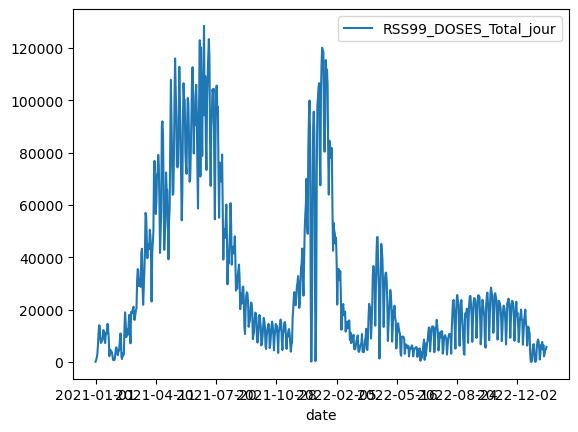

In [121]:
df_vacc_jour.plot(x= "date", y="RSS99_DOSES_Total_jour")